In [3]:
from pandas import read_csv, DataFrame
from factor_analyzer import FactorAnalyzer

study_home = '/home/camachocm2/Analysis/local_moochie/Aggregate_anats/GMD_ML'

cbq_data = read_csv(study_home + '/doc/subject_info.csv', index_col=0)
#features=cbq_data.iloc[:,13:28]

#fa = FactorAnalyzer()
#fa.analyze(features,4,rotation='oblimin', method='ml', normalize=True)
#print(fa.get_factor_variance())
cbq_data.head()

,X,freesurferID,SubjectID,Study,Sequence.Version,Potentially.Usable,in_analysis,Same.Kid.as.,Dx_Group,Age_yrs,...,male,MAP_Temper_Loss,MAP_Noncompliance,MAP_General_Aggression,MAP_Low_Concern,CT_QC,DB_factor,anger_factor,gmd_usable,Unnamed: 21
1,1,101,101,CARS,1,1,1,NaN,CTL,6.485969,...,0,7,1.332727,1.92,1.777778,1,-0.542141,-0.470770,1,NaN
2,2,102,102,CARS,1,1,1,D1009,CTL,6.143737,...,1,9,1.332727,1.28,1.777778,1,-0.528900,-0.512262,1,NaN
3,3,105,105,CARS,1,1,1,NaN,CTL,8.911704,...,1,10,2.285455,2.56,1.333333,1,-0.424601,-0.295520,1,NaN
4,4,107,107,CARS,1,1,1,NaN,CTL,8.123203,...,1,1,0.761818,0.64,0.444444,1,-0.855336,-0.821269,1,NaN
5,5,109,109,CARS,1,1,1,NaN,CTL,6.861054,...,0,0,0.190909,0.00,0.000000,1,-0.970009,-0.943016,1,NaN


In [ ]:
loadings = fa.loadings
loadings = loadings.sort_values('Factor1')
print(loadings)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(context='paper')
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>=0.25]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<=-0.25]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r', center=0)
plt.savefig(study_home + '/results/loadings_labeled_3factor.svg')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster',style='white')
features.hist(bins=30, figsize=(24,20))
plt.savefig(study_home + '/results/scale_distributions.svg')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
from scipy import stats
from pandas import read_csv
from numpy import isfinite
warnings.filterwarnings('ignore')
sns.set(context='talk',style='white')
output_dir = '/home/camachocm2/Analysis/local_moochie/Aggregate_anats/GMD_ML/ml_trainingset/grant/'
subject_info= read_csv('/home/camachocm2/Analysis/local_moochie/Aggregate_anats/GMD_ML/ml_trainingset/featureset_key.csv', index_col=0)
#subject_info = subject_info[subject_info['final_incl']==1]
subject_info = subject_info[isfinite(subject_info['genagg_yj'])].copy()
subject_info = subject_info[subject_info['Age_yrs']<8]
print(subject_info.describe())

for variable in ['Age_yrs', 'MAP_Temper_Loss','MAP_Noncompliance','MAP_General_Aggression','MAP_Low_Concern']:
    plt.figure(figsize=(4,4))
    sns.distplot(subject_info[variable],hist=True,kde=False,bins=20,color='teal', hist_kws={'edgecolor':'black'})
    plt.savefig(output_dir + variable + '_hist.svg')
    
#for variable in ['MAP_Temper_Loss','MAP_Noncompliance','MAP_General_Aggression','MAP_Low_Concern']:
#    plt.figure()
#    a = sns.jointplot(subject_info['Age_yrs'],subject_info[variable],
#                      marginal_kws={'kde':False,'bins':30})
#    a.annotate(stats.pearsonr,fontsize=12)
    #plt.savefig(variable+'_age_corr.svg')
#    plt.show()

for variable in ['temploss_yj', 'noncomp_yj', 'genagg_yj', 'lowcon_yj']:
    plt.figure(figsize=(4,4))
    sns.distplot(subject_info[variable],hist=True,kde=False,bins=20, color='indigo', hist_kws={'edgecolor':'black'})
    plt.savefig(output_dir + variable  +'_hist.svg')

                X    SubjectID  Sequence.Version  Potentially.Usable  \
count   72.000000    72.000000         72.000000                72.0   
mean    67.125000   847.333333          2.611111                 1.0   
std     36.473775   805.279603          1.262186                 0.0   
min      1.000000     2.000000          1.000000                 1.0   
25%     40.750000   109.750000          1.000000                 1.0   
50%     71.500000  1000.500000          2.000000                 1.0   
75%     94.500000  2003.250000          4.000000                 1.0   
max    124.000000  2038.000000          4.000000                 1.0   

       in_analysis    Age_yrs    Age_mos       male  MAP_Temper_Loss  \
count         72.0  72.000000  72.000000  72.000000        72.000000   
mean           1.0   6.662560  79.402778   0.555556        19.680556   
std            0.0   0.933371  11.193131   0.500391        17.625067   
min            1.0   4.169747  50.000000   0.000000         0.0

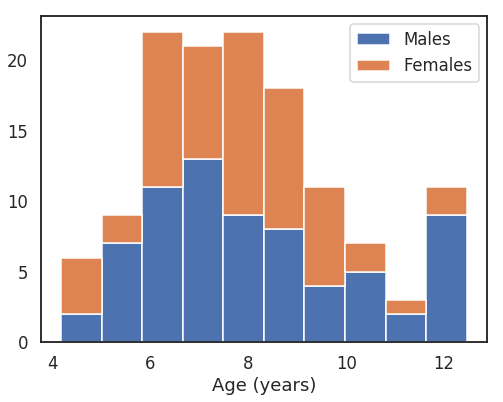

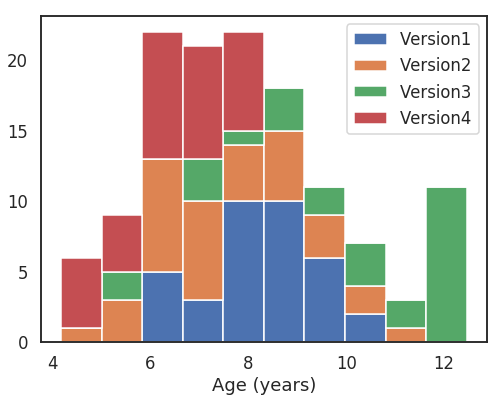

In [32]:
males = subject_info[subject_info['male']==1]
females = subject_info[subject_info['male']==0]

plt.figure(figsize=(8,6))
plt.hist([males['Age_yrs'],females['Age_yrs']], stacked=True, label=['Males','Females'])
plt.legend()
plt.xlabel('Age (years)')
plt.savefig(output_dir + 'age_sex_hist.svg')
plt.show()


s1 = subject_info[subject_info['seq1']==1]
s2 = subject_info[subject_info['seq2']==1]
s3 = subject_info[subject_info['seq3']==1]
s4 = subject_info[subject_info['seq4']==1]

plt.figure(figsize=(8,6))
plt.hist([s1['Age_yrs'],s2['Age_yrs'],s3['Age_yrs'],s4['Age_yrs']], stacked=True, label=['Version1','Version2','Version3','Version4'])
plt.legend()
plt.xlabel('Age (years)')
plt.savefig(output_dir + 'age_seq_hist.svg')
plt.show()